<a href="https://colab.research.google.com/github/mary-boti/ET5003_SEM1_2021-2/blob/main/ET5003_Etivity2_MariannaBotika_ID_20188277.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_Etivity-2

In [549]:
#@title Current Date
Today = '2021-10-4' #@param {type:"date"}


In [550]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "20188277" #@param {type:"string"}
Student_full_name = "Marianna Botika" #@param {type:"string"}
#@markdown ---

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = Final #@param ["Draft", "Final"] {type:"raw"}
Submission = True #@param {type:"boolean"}

# INTRODUCTION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

***The goal is to use advanced Machine Learning methods to predict House price.***

**Task:**

You have to create a piecewise regression model following the guidelines from the notebook provided to predict the house price using the provided dataset in the GitHub repository.

*   Get the dataset: train, test, and true price.
*   Analyse the dataset and decide what features to use.
*   Clean the dataset: remove nan's and possible outliers.
*   You could remove registers with 0 bathrooms and 0 bedrooms.
*   Your goal is to use a piecewise regression to solve this problem.
*   Follow the guidelines from the example provided.
*   Apply a full model first as a baseline.
*   You could select longitude and latitude to create clusters.
*   Use the number of clusters you model returns.
*   Apply a model to each cluster.
*   Analyse the results and give a comparison from both approaches
*   You could split the training to get a validation dataset.
*   Take notes from all the experiment results and bring your insights in your summary.

This task is to compare linear regression and piecewise linear regression.
The advantage of this is the data may have underlying linear relationships, but a single linear model wont be able to distinguish.

## IMPORTS

In [551]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [552]:
import pandas as pd
import matplotlib.pyplot as plt

# to use mathematical functions
import numpy as np

# for Bayesian statistical modeling and probabilistic ML
import pymc3 as pm

# for exploratory analysis of Bayesian models
import arviz as az
from sklearn.preprocessing import StandardScaler

In [553]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
import sklearn.datasets as dt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [554]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-ET5003/ET5003_SEM1_2021-2/tree/main/Week-3). 

2. Upload the dataset into your folder.



**The challenge is to predict the final price of each house.**

In [555]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [556]:
# Path, copy the path from your Drive
syntPath = '/content/drive/My Drive/Colab Notebooks/house-data/' 

In [557]:
# House Data
house_train = syntPath + 'house_train.csv'
house_test = syntPath + 'house_test.csv'
true_price = syntPath + 'true_price.csv'

In [558]:
# Read datasets
house_train = pd.read_csv(house_train)
house_test = pd.read_csv(house_test)
true_price = pd.read_csv(true_price)

### **Data Analysis**

**Starting with 'True Price' (as a less complex parameter)**

In [559]:
# Print some samples
true_price.sample(5)

,Id,Expected
305,12322483,395000.0
26,11685896,495000.0
110,12418528,277500.0
202,12407568,280000.0
35,12219606,1475000.0


In [560]:
#Getting summary of the data
true_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        500 non-null    int64  
 1   Expected  500 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [561]:
#Undertanding Data Shapes: Rows & Columns
true_price.shape

(500, 2)

In [562]:
# Id needs to remove it from the dataset
true_price.drop('Id', axis=1, inplace=True)

'ID' has unique value for each row, so it should be removed, due to imposibility to work with this data 

In [563]:
# Printing anther samples
true_price.sample(5)

,Expected
344,1450000.0
475,325000.0
483,450000.0
236,550000.0
263,280000.0


**Continuing with 'House Data' (as a more complex parameter)**

In [564]:
# Print some samples from the train dataset
house_train.sample(5)

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
2419,12408948,Clondalkin,1.0,2.0,C3,Dublin,Jim Payne Property Consultants MIPAV MMCEPI TR...,prod,NaN,None,53.323952,-6.400998,NaN,199000.0,sale,duplex,52.00
2686,12418704,Dublin 7,1.0,1.0,E1,Dublin,Earnest estate agents are delighted to bring t...,prod,Gas Fired Central Heating,3RD FLOOR APARTMENT \nSOUGHT AFTER DEVELOPMENT...,53.347308,-6.282985,NaN,220000.0,sale,apartment,34.00
209,12037545,Foxrock,6.0,7.0,D1,Dublin,Standing well detached in a lovely secluded sh...,prod,NaN,Excellent public transport to include the LUAS...,53.265939,-6.178398,NaN,1900000.0,sale,detached,429.95
2035,12393011,Castleknock,5.0,5.0,C2,Dublin,Floor area c. 308 sq.m / 3324 sq.ft \nFlynn &a...,prod,NaN,Detached Five Bedroom Family Home\nWide Gated ...,53.371126,-6.358806,NaN,1500000.0,sale,detached,308.00
1422,12373799,Balbriggan,1.0,3.0,E1,Dublin,No. 34 Curran Park is a three bed mid terrace ...,prod,NaN,- Excellent 3 bed family home located in estab...,53.604757,-6.180553,NaN,230000.0,sale,semi-detached,92.00


In [565]:
# Print some samples the test dataset
house_test.sample(5)

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,property_category,property_type,surface
457,12412942,Dublin 2,1.0,1.0,E1,Dublin,Stokes Property are delighted to bring to the ...,prod,"Parking,Wired for Cable Television,Wheelchair ...",Recently refurbished\nExcellent location in Ta...,53.345728,-6.254845,NaN,sale,apartment,45.0
404,12419051,Knocklyon,2.0,3.0,C1,Dublin,Open viewing this Saturday 7th March at 12.00 ...,prod,NaN,G.F.C.H. (New Viessmann boiler installed in 20...,53.278792,-6.329823,NaN,sale,semi-detached,98.0
389,12378378,Portmarnock,3.0,4.0,C1,Dublin,The property comprises a most elegant detached...,prod,NaN,Magnificent detached family residence\nPrivate...,53.416494,-6.154374,NaN,sale,detached,133.3
189,12425620,Portmarnock,2.0,4.0,NaN,Dublin,Welcome to No. 21 Wendell Avenue a property th...,prod,NaN,South Facing rear garden\nGas fired radiator c...,53.434138,-6.128787,NaN,sale,semi-detached,141.0
388,12417336,Santry,2.0,3.0,G,Dublin,Smith &amp; Butler Estates are delighted to of...,prod,NaN,Development potential subject to P.P. \nFront...,53.391172,-6.237203,NaN,sale,semi-detached,105.0


In [566]:
# Id comumn is an integer type, we would need to remove it from both datasets
house_train.drop('ad_id', axis=1, inplace=True)
house_test.drop('ad_id', axis=1, inplace=True)

In [567]:
# Printing anther samples for the train dataset
house_train.sample(2)

,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
2304,Kimmage,2.0,5.0,E2,Dublin,A character bay windowed semi-detached 1930€TM...,prod,NaN,C. 205.3m2 / 2210 ft2\nGFCH\nOn c. 0.226 Acres...,53.312919,-6.306691,NaN,795000.0,sale,semi-detached,205.3
1392,Coolock,1.0,4.0,NaN,Dublin,LEONARD WILSON KEENAN ESTATE &amp; LETTING AGE...,prod,NaN,None,53.396101,-6.198002,NaN,284950.0,sale,end-of-terrace,NaN


In [568]:
#Printing all column names for the train dataset
house_train.columns

Index(['area', 'bathrooms', 'beds', 'ber_classification', 'county',
       'description_block', 'environment', 'facility', 'features', 'latitude',
       'longitude', 'no_of_units', 'price', 'property_category',
       'property_type', 'surface'],
      dtype='object')

In [569]:
# Printing anther samples for the test dataset
house_test.sample(2)

,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,property_category,property_type,surface
342,Dalkey,4.0,5.0,D2,Dublin,Sherry FitzGerald are proud to present Rockvie...,prod,NaN,Wonderfully secure grounds of 0.28 acre behind...,53.277254,-6.096967,NaN,sale,detached,348.0
12,Terenure,3.0,3.0,D1,Dublin,57 Bushy Park Road is a rare opportunity to ac...,prod,NaN,Wonderfully bright and tastefully appointed ac...,53.307253,-6.278477,NaN,sale,detached,220.4


In [570]:
#Printing all column names for the test dataset
house_test.columns

Index(['area', 'bathrooms', 'beds', 'ber_classification', 'county',
       'description_block', 'environment', 'facility', 'features', 'latitude',
       'longitude', 'no_of_units', 'property_category', 'property_type',
       'surface'],
      dtype='object')

In [571]:
#Undertanding Data Shapes: Rows & Columns (for house_train)
house_train.shape

(2982, 16)

In [572]:
#Undertanding Data Shapes: Rows & Columns (for house_test)
house_test.shape

(500, 15)

In [573]:
#Getting summary of the data (house_train)
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area                2982 non-null   object 
 1   bathrooms           2931 non-null   float64
 2   beds                2931 non-null   float64
 3   ber_classification  2305 non-null   object 
 4   county              2982 non-null   object 
 5   description_block   2982 non-null   object 
 6   environment         2982 non-null   object 
 7   facility            965 non-null    object 
 8   features            2982 non-null   object 
 9   latitude            2982 non-null   float64
 10  longitude           2982 non-null   float64
 11  no_of_units         59 non-null     float64
 12  price               2892 non-null   float64
 13  property_category   2982 non-null   object 
 14  property_type       2931 non-null   object 
 15  surface             2431 non-null   float64
dtypes: flo

In [574]:
#Getting summary of the data (house_test)
house_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area                500 non-null    object 
 1   bathrooms           500 non-null    float64
 2   beds                500 non-null    float64
 3   ber_classification  444 non-null    object 
 4   county              500 non-null    object 
 5   description_block   500 non-null    object 
 6   environment         500 non-null    object 
 7   facility            189 non-null    object 
 8   features            500 non-null    object 
 9   latitude            500 non-null    float64
 10  longitude           500 non-null    float64
 11  no_of_units         0 non-null      float64
 12  property_category   500 non-null    object 
 13  property_type       500 non-null    object 
 14  surface             500 non-null    float64
dtypes: float64(6), object(9)
memory usage: 58.7+ KB


In [575]:
# Missing Values for the train dataset
house_train.isna().sum()

area                     0
bathrooms               51
beds                    51
ber_classification     677
county                   0
description_block        0
environment              0
facility              2017
features                 0
latitude                 0
longitude                0
no_of_units           2923
price                   90
property_category        0
property_type           51
surface                551
dtype: int64

As per above, we have a total of 2982 rows and 16 columns in the training data.

'facility' has 2017 of values missing

'no_of_units' has 2923 of values missing, i.g. almost all values are missing

Pairplots bathrooms, beds, price, surface


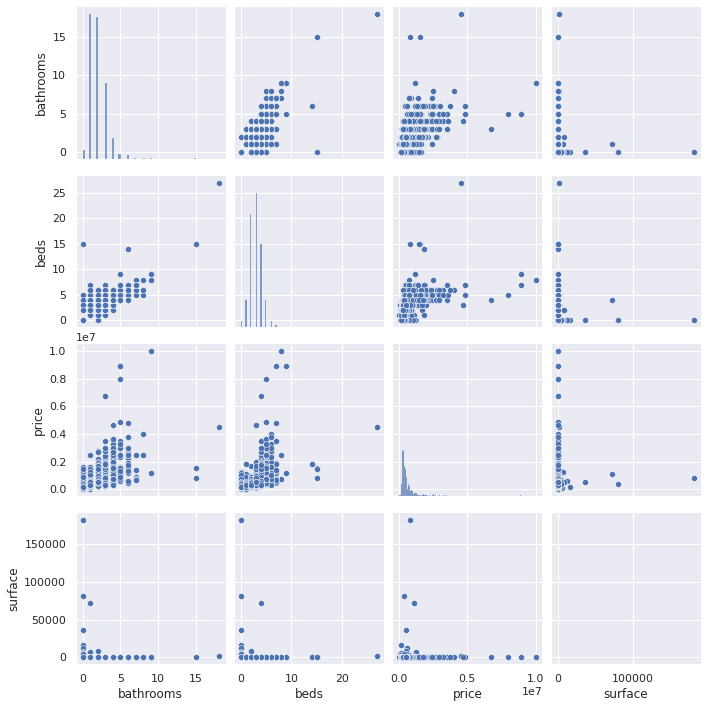

In [576]:
# Checking the relationship between bathrooms, beds price and surface (most important integers)
# Did not include facility (missing values 2017) and no of units (missing values 2923)
print('Pairplots bathrooms, beds, price, surface')
sns.pairplot(data=house_train[['bathrooms','beds','price','surface']].dropna())
plt.show()

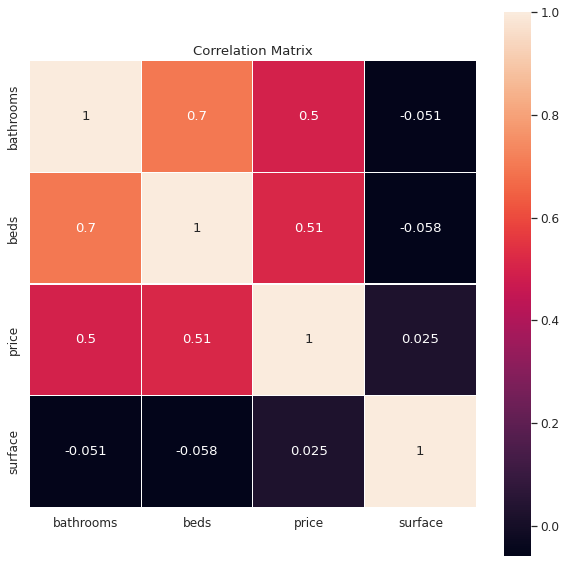

In [577]:
# Analyzing the relationships between bathrooms, beds price and surface

matrix=house_train[['bathrooms','beds','price','surface']].dropna()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))
plt.title('Correlation Matrix')
sns.heatmap(matrix.corr(),linewidths=0.01,square=True,annot=True)

In [578]:
# Missing Values for the test dataset
house_test.isna().sum()

area                    0
bathrooms               0
beds                    0
ber_classification     56
county                  0
description_block       0
environment             0
facility              311
features                0
latitude                0
longitude               0
no_of_units           500
property_category       0
property_type           0
surface                 0
dtype: int64

In [579]:
# NAN Values for training data. Transforming into %
print(house_train.isna().mean().round(4) * 100)

area                   0.00
bathrooms              1.71
beds                   1.71
ber_classification    22.70
county                 0.00
description_block      0.00
environment            0.00
facility              67.64
features               0.00
latitude               0.00
longitude              0.00
no_of_units           98.02
price                  3.02
property_category      0.00
property_type          1.71
surface               18.48
dtype: float64


In [580]:
## NAN Values for test data. Transforming into %
print(house_test.isna().mean().round(4) * 100)

area                    0.0
bathrooms               0.0
beds                    0.0
ber_classification     11.2
county                  0.0
description_block       0.0
environment             0.0
facility               62.2
features                0.0
latitude                0.0
longitude               0.0
no_of_units           100.0
property_category       0.0
property_type           0.0
surface                 0.0
dtype: float64


In [581]:
# Identifying columns that have the same value
# Feedback from the peers 
columnlist = []
def is_unique(s):
    a = s.to_numpy()
    return (a[0] == a).all()

for column in house_train:
    if (is_unique(house_train[column]) == True): 
        print(column)
        columnlist.append(str(column))
print(columnlist)

for column in house_test:
    if (is_unique(house_test[column]) == True): 
        print(column)
        columnlist.append(str(column))
print(columnlist)

county
environment
['county', 'environment']
county
environment
property_category
['county', 'environment', 'county', 'environment', 'property_category']


**Missing values**

Bellow features will be dropped to have clean data and to reflect the true accuracy of the model

Bathrooms

In [582]:
# running for the train data only, as per above there are no missing bathrooms in test data
house_train.dropna(subset=['bathrooms'], inplace=True)

Number of Units

In [583]:
# running for both train and test data
house_train.drop('no_of_units', axis=1, inplace=True)
house_test.drop('no_of_units', axis=1, inplace=True)

Price

In [584]:
# running for the train data only, as price should be generated
house_train.dropna(subset=['price'], inplace=True)

Surface

In [585]:
# running for the train data only, as per above there are no missing surface in test data
house_train['surface'].fillna(house_train['surface'].median(), inplace=True)

**Categorical Attributes**

'Area' is represented with named values

In [586]:
house_train['area'].replace({'Temple Bar':'Dublin 1', 'IFSC':'Dublin 1', 
                            'Grand Canal Dock':'Dublin 2',
                            'Clontarf':'Dublin 3', 'East Wall':'Dublin 3', 'North Strand':'Dublin 3', 'Fairview':'Dublin 3', 'Marino':'Dublin 3', 'Ballyboughal':'Dublin 3', 
                            'Ballsbridge':'Dublin 4', 'Donnybrook':'Dublin 4','Sandymount':'Dublin 4','Ringsend':'Dublin 4','Irishtown':'Dublin 4','Merrion':'Dublin 4',
                            'Artane':'Dublin 5','Raheny':'Dublin 5','Kilbarrack':'Dublin 5','Edenmore':'Dublin 5','Kilmore':'Dublin 5','Donnycarney':'Dublin 5',
                            'Rathmines':'Dublin 6','Rathgar':'Dublin 6','Ranelagh':'Dublin 6','Milltown':'Dublin 6','Dartry':'Dublin 6',
                            'Stoneybatter':'Dublin 7','Phibsborough':'Dublin 7','Navan Road (D7)':'Dublin 7','North Circular Road':'Dublin 7','Smithfield':'Dublin 7','Ashtown':'Dublin 7','Cabra':'Dublin 7',
                            'Kilmainham':'Dublin 8','Inchicore':'Dublin 8','Rialto':'Dublin 8','Portobello':'Dublin 8','South Circular Road':'Dublin 8','Islandbridge':'Dublin 8','The Coombe':'Dublin 8',"Dolphin's Barn":'Dublin 8','Christchurch':'Dublin 8',
                            'Drumcondra':'Dublin 9','Glasnevin':'Dublin 9','Santry':'Dublin 9','Whitehall':'Dublin 9','Beaumont':'Dublin 9','Ballymun':'Dublin 9','Poppintree':'Dublin 9',
                            'Ballyfermot':'Dublin 10','Cherry Orchard':'Dublin 10',
                            'Finglas':'Dublin 11',"St Margaret's":'Dublin 11',
                            'Walkinstown':'Dublin 12','Crumlin':'Dublin 12','Drimnagh':'Dublin 12','Bluebell':'Dublin 12','Park West':'Dublin 12','Perrystown':'Dublin 12',
                            'Malahide':'Dublin 13','Howth':'Dublin 13','Sutton':'Dublin 13','Baldoyle':'Dublin 13','Donaghmede':'Dublin 13','Bayside':'Dublin 13','Ard Na Greine':'Dublin 13','Clongriffin':'Dublin 13','Clarehall':'Dublin 13',
                            'Dundrum':'Dublin 14','Churchtown':'Dublin 14','Goatstown':'Dublin 14','Clonskeagh':'Dublin 14','Windy Arbour':'Dublin 14',
                            'Carpenterstown':'Dublin 15','Castleknock':'Dublin 15','Clonsilla':'Dublin 15','Blanchardstown':'Dublin 15','Clonee':'Dublin 15','Coolmine':'Dublin 15','Hartstown':'Dublin 15','Mulhuddart':'Dublin 15','The Ward':'Dublin 15','Ongar':'Dublin 15','Tyrrelstown':'Dublin 15',
                            'Rathfarnham':'Dublin 16','Ballinteer':'Dublin 16','Ballinascorney':'Dublin 16','Knocklyon':'Dublin 16',
                            'Darndale':'Dublin 17','Clonshaugh':'Dublin 17','Coolock':'Dublin 17','Killester':'Dublin 17',
                            'Deansgrange':'Dublin 18','Sandyford':'Dublin 18','Foxrock':'Dublin 18','Stepaside':'Dublin 18','Cabinteely':'Dublin 18','Carrickmines':'Dublin 18','Leopardstown':'Dublin 18','Kilternan':'Dublin 18','Shankill':'Dublin 18',
                            'Palmerstown':'Dublin 20','Chapelizod':'Dublin 20','Lucan':'Dublin 20',
                            'Clondalkin':'Dublin 22','Kingswood':'Dublin 22','Newcastle':'Dublin 22',
                            'Ballymount':'Dublin 24','Kiltipper':'Dublin 24','Tallaght':'Dublin 24','Balrothery':'Dublin 24','Rathcoole':'Dublin 24','Kilnamanagh':'Dublin 24','Firhouse':'Dublin 24','Greenhills':'Dublin 24','Oldbawn':'Dublin 24','Adamstown':'Dublin 24','Saggart':'Dublin 24','Citywest':'Dublin 24','Ballycullen':'Dublin 24','Brittas':'Dublin 24',
                            'Terenure':'Dublin 6w',"Harold's Cross":'Dublin 6w','Kimmage':'Dublin 6w','Templeogue':'Dublin 6w',
                            'Donabate':'Co. Fingal','Swords':'Co. Fingal','Portmarnock':'Co. Fingal','Kinsealy':'Co. Fingal','Balgriffin':'Co. Fingal','Garristown':'Co. Fingal','Naul':'Co. Fingal','Skerries':'Co. Fingal','Rush':'Co. Fingal','Lusk':'Co. Fingal','Balbriggan':'Co. Fingal','Loughshinny':'Co. Fingal','Ballybough':'Co. Fingal',
                            'Blackrock':'Co. Dun Laoghaire-Rathdown','Dun Laoghaire':'Co. Dun Laoghaire-Rathdown','Glenageary':'Co. Dun Laoghaire-Rathdown',
                            'Monkstown':'Co. Dun Laoghaire-Rathdown','Booterstown':'Co. Dun Laoghaire-Rathdown','Sandycove':'Co. Dun Laoghaire-Rathdown',
                            'Rathmichael':'Co. Dun Laoghaire-Rathdown','Mount Merrion':'Co. Dun Laoghaire-Rathdown','Ballybrack':'Co. Dun Laoghaire-Rathdown','Sallynoggin':'Co. Dun Laoghaire-Rathdown',
                            'Kilmacud':'Co. Dun Laoghaire-Rathdown','Dalkey':'Co. Dun Laoghaire-Rathdown','Killiney':'Co. Dun Laoghaire-Rathdown','Loughlinstown':'Co. Dun Laoghaire-Rathdown',
                            }, inplace=True)

In [587]:
house_test['area'].replace({'Temple Bar':'Dublin 1', 'IFSC':'Dublin 1', 
                            'Grand Canal Dock':'Dublin 2',
                            'Clontarf':'Dublin 3', 'East Wall':'Dublin 3', 'North Strand':'Dublin 3', 'Fairview':'Dublin 3', 'Marino':'Dublin 3', 'Ballyboughal':'Dublin 3', 
                            'Ballsbridge':'Dublin 4', 'Donnybrook':'Dublin 4','Sandymount':'Dublin 4','Ringsend':'Dublin 4','Irishtown':'Dublin 4','Merrion':'Dublin 4',
                            'Artane':'Dublin 5','Raheny':'Dublin 5','Kilbarrack':'Dublin 5','Edenmore':'Dublin 5','Kilmore':'Dublin 5','Donnycarney':'Dublin 5',
                            'Rathmines':'Dublin 6','Rathgar':'Dublin 6','Ranelagh':'Dublin 6','Milltown':'Dublin 6','Dartry':'Dublin 6',
                            'Stoneybatter':'Dublin 7','Phibsborough':'Dublin 7','Navan Road (D7)':'Dublin 7','North Circular Road':'Dublin 7','Smithfield':'Dublin 7','Ashtown':'Dublin 7','Cabra':'Dublin 7',
                            'Kilmainham':'Dublin 8','Inchicore':'Dublin 8','Rialto':'Dublin 8','Portobello':'Dublin 8','South Circular Road':'Dublin 8','Islandbridge':'Dublin 8','The Coombe':'Dublin 8',"Dolphin's Barn":'Dublin 8','Christchurch':'Dublin 8',
                            'Drumcondra':'Dublin 9','Glasnevin':'Dublin 9','Santry':'Dublin 9','Whitehall':'Dublin 9','Beaumont':'Dublin 9','Ballymun':'Dublin 9','Poppintree':'Dublin 9',
                            'Ballyfermot':'Dublin 10','Cherry Orchard':'Dublin 10',
                            'Finglas':'Dublin 11',"St Margaret's":'Dublin 11',
                            'Walkinstown':'Dublin 12','Crumlin':'Dublin 12','Drimnagh':'Dublin 12','Bluebell':'Dublin 12','Park West':'Dublin 12','Perrystown':'Dublin 12',
                            'Malahide':'Dublin 13','Howth':'Dublin 13','Sutton':'Dublin 13','Baldoyle':'Dublin 13','Donaghmede':'Dublin 13','Bayside':'Dublin 13','Ard Na Greine':'Dublin 13','Clongriffin':'Dublin 13','Clarehall':'Dublin 13',
                            'Dundrum':'Dublin 14','Churchtown':'Dublin 14','Goatstown':'Dublin 14','Clonskeagh':'Dublin 14','Windy Arbour':'Dublin 14',
                            'Carpenterstown':'Dublin 15','Castleknock':'Dublin 15','Clonsilla':'Dublin 15','Blanchardstown':'Dublin 15','Clonee':'Dublin 15','Coolmine':'Dublin 15','Hartstown':'Dublin 15','Mulhuddart':'Dublin 15','The Ward':'Dublin 15','Ongar':'Dublin 15','Tyrrelstown':'Dublin 15',
                            'Rathfarnham':'Dublin 16','Ballinteer':'Dublin 16','Ballinascorney':'Dublin 16','Knocklyon':'Dublin 16',
                            'Darndale':'Dublin 17','Clonshaugh':'Dublin 17','Coolock':'Dublin 17','Killester':'Dublin 17',
                            'Deansgrange':'Dublin 18','Sandyford':'Dublin 18','Foxrock':'Dublin 18','Stepaside':'Dublin 18','Cabinteely':'Dublin 18','Carrickmines':'Dublin 18','Leopardstown':'Dublin 18','Kilternan':'Dublin 18','Shankill':'Dublin 18',
                            'Palmerstown':'Dublin 20','Chapelizod':'Dublin 20','Lucan':'Dublin 20',
                            'Clondalkin':'Dublin 22','Kingswood':'Dublin 22','Newcastle':'Dublin 22',
                            'Ballymount':'Dublin 24','Kiltipper':'Dublin 24','Tallaght':'Dublin 24','Balrothery':'Dublin 24','Rathcoole':'Dublin 24','Kilnamanagh':'Dublin 24','Firhouse':'Dublin 24','Greenhills':'Dublin 24','Oldbawn':'Dublin 24','Adamstown':'Dublin 24','Saggart':'Dublin 24','Citywest':'Dublin 24','Ballycullen':'Dublin 24','Brittas':'Dublin 24',
                            'Terenure':'Dublin 6w',"Harold's Cross":'Dublin 6w','Kimmage':'Dublin 6w','Templeogue':'Dublin 6w',
                            'Donabate':'Co. Fingal','Swords':'Co. Fingal','Portmarnock':'Co. Fingal','Kinsealy':'Co. Fingal','Balgriffin':'Co. Fingal','Garristown':'Co. Fingal','Naul':'Co. Fingal','Skerries':'Co. Fingal','Rush':'Co. Fingal','Lusk':'Co. Fingal','Balbriggan':'Co. Fingal','Loughshinny':'Co. Fingal','Ballybough':'Co. Fingal',
                            'Blackrock':'Co. Dun Laoghaire-Rathdown','Dun Laoghaire':'Co. Dun Laoghaire-Rathdown','Glenageary':'Co. Dun Laoghaire-Rathdown',
                            'Monkstown':'Co. Dun Laoghaire-Rathdown','Booterstown':'Co. Dun Laoghaire-Rathdown','Sandycove':'Co. Dun Laoghaire-Rathdown',
                            'Rathmichael':'Co. Dun Laoghaire-Rathdown','Mount Merrion':'Co. Dun Laoghaire-Rathdown','Ballybrack':'Co. Dun Laoghaire-Rathdown','Sallynoggin':'Co. Dun Laoghaire-Rathdown',
                            'Kilmacud':'Co. Dun Laoghaire-Rathdown','Dalkey':'Co. Dun Laoghaire-Rathdown','Killiney':'Co. Dun Laoghaire-Rathdown','Loughlinstown':'Co. Dun Laoghaire-Rathdown',
                            }, inplace=True)

In [588]:
house_train['area'].value_counts()

Co. Fingal                    300
Co. Dun Laoghaire-Rathdown    253
Dublin 15                     214
Dublin 9                      197
Dublin 24                     179
Dublin 13                     175
Dublin 18                     155
Dublin 4                      146
Dublin 16                     128
Dublin 8                      127
Dublin 7                      118
Dublin 20                      96
Dublin 3                       96
Dublin 11                      92
Dublin 12                      86
Dublin 14                      84
Dublin 6                       80
Dublin 6w                      78
Dublin 22                      71
Dublin 1                       68
Dublin 5                       68
Dublin 2                       39
Dublin 17                      29
Dublin 10                      13
Name: area, dtype: int64

In [589]:
house_test['area'].value_counts()

Co. Fingal                    62
Co. Dun Laoghaire-Rathdown    55
Dublin 4                      36
Dublin 15                     30
Dublin 18                     30
Dublin 9                      29
Dublin 6w                     26
Dublin 8                      25
Dublin 3                      24
Dublin 16                     23
Dublin 7                      22
Dublin 13                     21
Dublin 6                      20
Dublin 24                     18
Dublin 5                      17
Dublin 20                     17
Dublin 12                     12
Dublin 14                     10
Dublin 22                      8
Dublin 2                       5
Dublin 1                       4
Dublin 17                      3
Dublin 11                      2
Dublin 10                      1
Name: area, dtype: int64

In [590]:
# One hot encoding of columns area
one_hot = pd.get_dummies(house_train['area'])
one_hot_ = pd.get_dummies(house_test['area'])


In [591]:
# Droping column Area 
house_test = house_test.drop('area', axis=1)
house_train = house_train.drop('area', axis=1)


In [592]:
# Joining the encoded dataframe
house_train = house_train.join(one_hot)
house_test = house_test.join(one_hot_)

BER Classification

In [593]:
house_train['ber_classification'].value_counts()

D1                     283
D2                     272
C3                     264
C2                     242
C1                     211
E1                     182
E2                     168
G                      164
F                      163
B3                     130
B2                      73
A3                      66
SINo666of2006exempt     25
A2                      24
B1                      16
A1                       1
Name: ber_classification, dtype: int64

In [594]:
ber_classification_mapper = {
    "A1": 1,
    "A2": 2,
    "A3": 3,
    "B1": 4,
    "B2": 5,
    "B3": 6,
    "C1": 7,
    "C2": 8,
    "C3": 9,
    "D1": 10,
    "D2": 11,
    "E1": 12,
    "E2": 13,
    "F": 14,
    "G": 15,
    "SINo666of2006exempt": 16,
}
house_train['ber_classification'] = house_train['ber_classification'].replace(ber_classification_mapper)
house_test['ber_classification'] = house_test['ber_classification'].replace(ber_classification_mapper)

In [595]:
house_train['ber_classification'].fillna(house_train['ber_classification'].median(), inplace=True)
house_test['ber_classification'].fillna(house_test['ber_classification'].median(), inplace=True)

County

In [596]:
house_train['county'].value_counts()

Dublin    2892
Name: county, dtype: int64

In [597]:
house_train.drop('county', axis=1, inplace=True)
house_test.drop('county', axis=1, inplace=True)

Description Block

In [598]:
house_train['description_block'].head(2)

15    *  Final Luxury 5 Bedroom Home Remaining *\n\r...
26    *ONE HOUSE REMAINING* \n\r\n1 x Type B - Semi-...
Name: description_block, dtype: object

In [599]:
house_train.drop('description_block', axis=1, inplace=True)
house_test.drop('description_block', axis=1, inplace=True)

Environment

In [600]:
house_train['environment'].value_counts()

prod    2892
Name: environment, dtype: int64

In [601]:
house_train.drop('environment', axis=1, inplace=True)
house_test.drop('environment', axis=1, inplace=True)

Facility

In [602]:
house_train['facility'].value_counts()

Parking,Gas Fired Central Heating                                                               184
Parking                                                                                         133
Parking,Gas Fired Central Heating,Wired for Cable Television                                    116
Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television                              109
Parking,Gas Fired Central Heating,Alarm                                                          87
Parking,Wired for Cable Television                                                               51
Gas Fired Central Heating                                                                        46
Parking,Alarm                                                                                    26
Parking,Oil Fired Central Heating                                                                24
Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television,Wheelchair Access             18


In [603]:
house_train.drop('facility', axis=1, inplace=True)
house_test.drop('facility', axis=1, inplace=True)

Features

In [604]:
house_train['features'].head(2)

15    None
26    None
Name: features, dtype: object

In [605]:
house_train.drop('features', axis=1, inplace=True)
house_test.drop('features', axis=1, inplace=True)

Property Category

In [606]:
house_train['property_category'].value_counts()

sale                      2885
new_development_parent       7
Name: property_category, dtype: int64

In [607]:
property_category_mapper = {
    "sale": 0,
    "new_development_parent": 1
}

house_train['property_category'] = house_train['property_category'].replace(property_category_mapper)
house_test['property_category'] = house_test['property_category'].replace(property_category_mapper)

Property Type

In [608]:
house_train['property_type'].value_counts()

apartment         756
semi-detached     749
terraced          549
detached          385
end-of-terrace    235
bungalow           80
duplex             60
site               48
townhouse          27
studio              3
Name: property_type, dtype: int64

In [609]:
# One hot encoding of columns area
one_hot = pd.get_dummies(house_train['property_type'])
one_hot_ = pd.get_dummies(house_test['property_type'])


In [610]:
# Droping column property type 
house_test = house_test.drop('property_type', axis=1)
house_train = house_train.drop('property_type', axis=1)


In [611]:
# Joining the encoded dataframe
house_train = house_train.join(one_hot)
house_test = house_test.join(one_hot_)

**Outliers**

<Figure size 1584x2160 with 0 Axes>

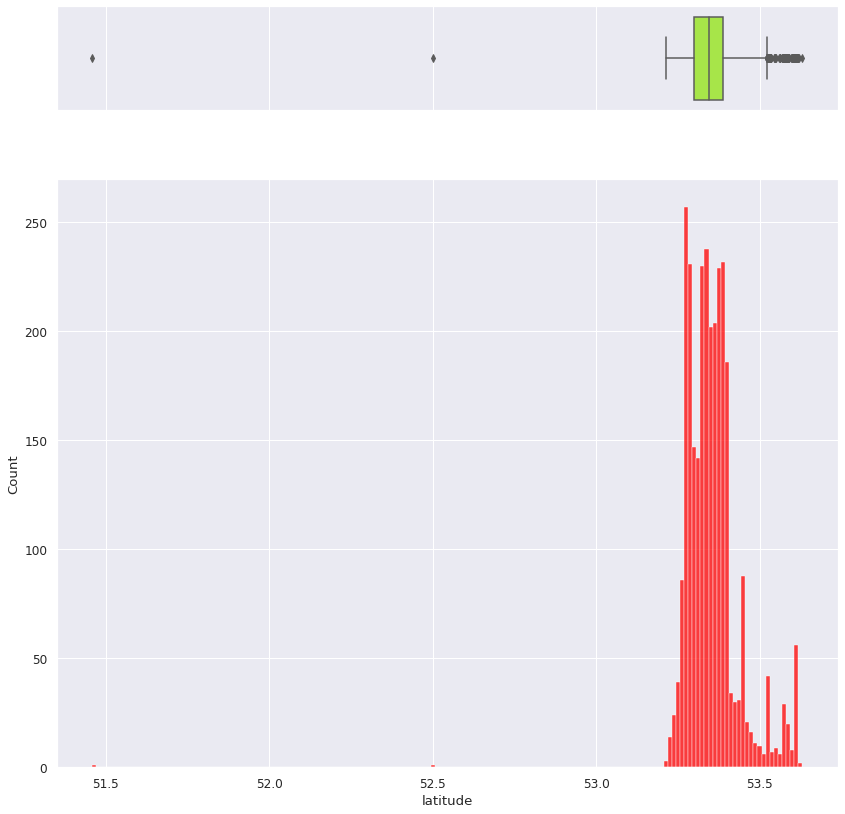

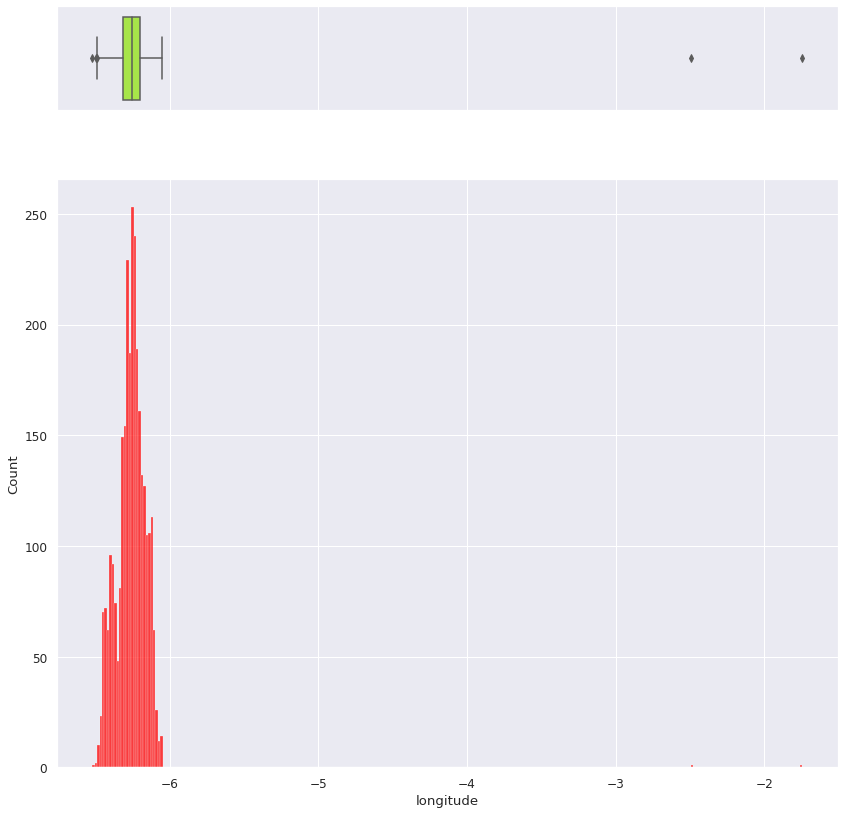

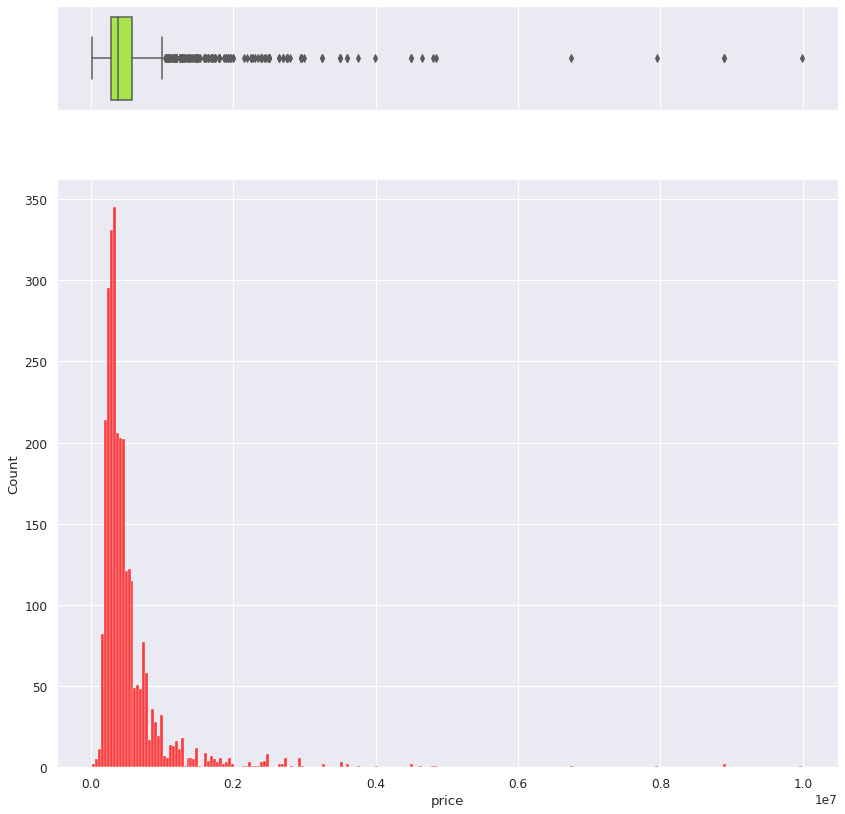

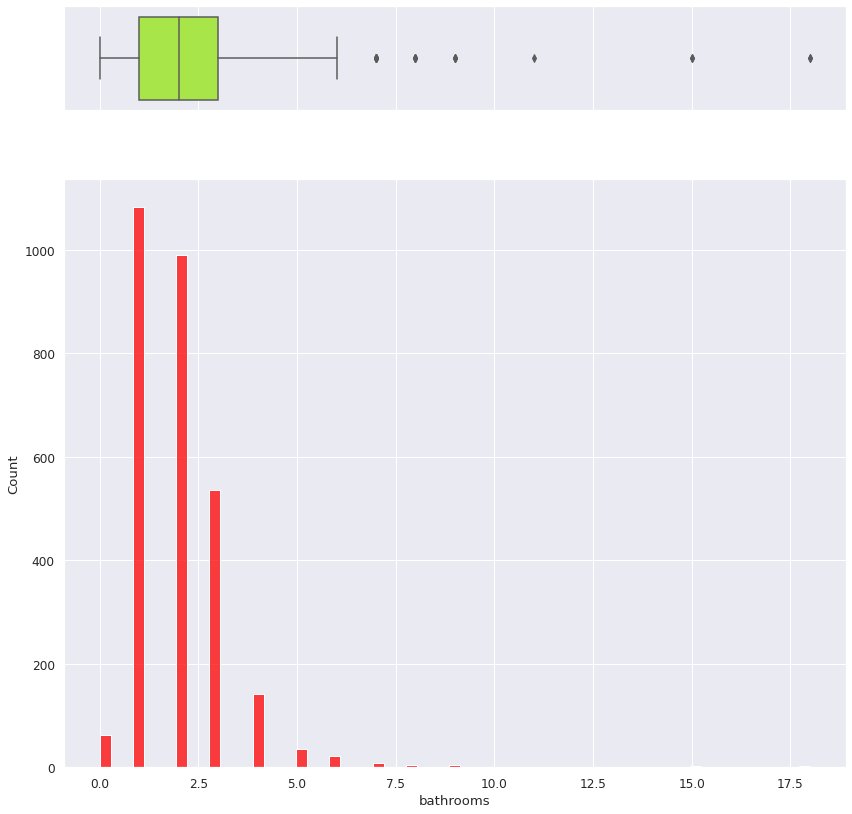

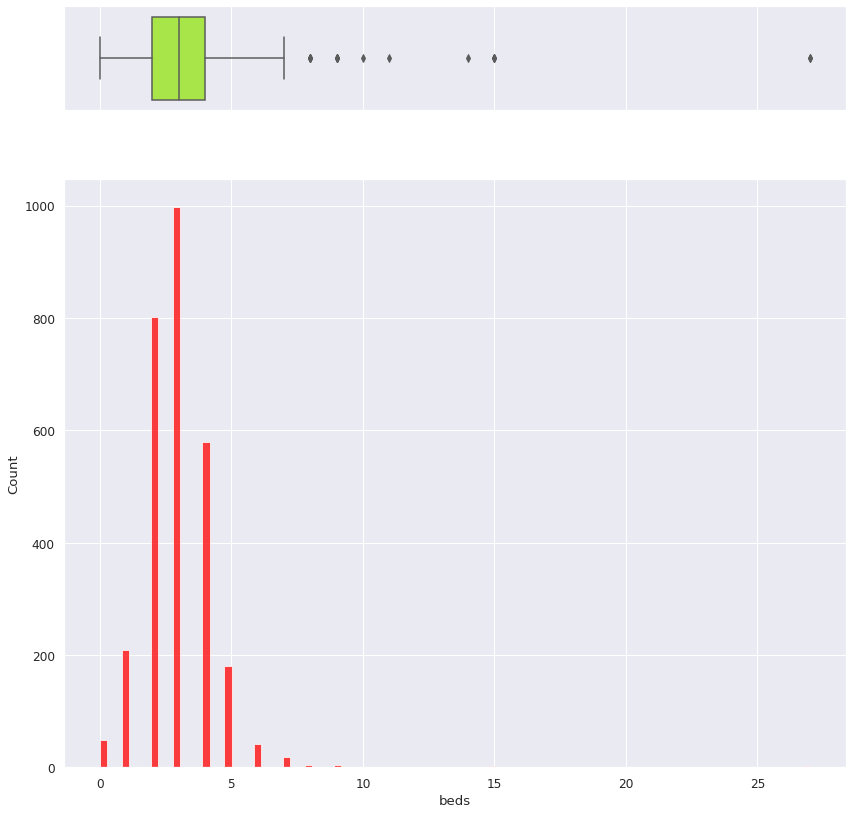

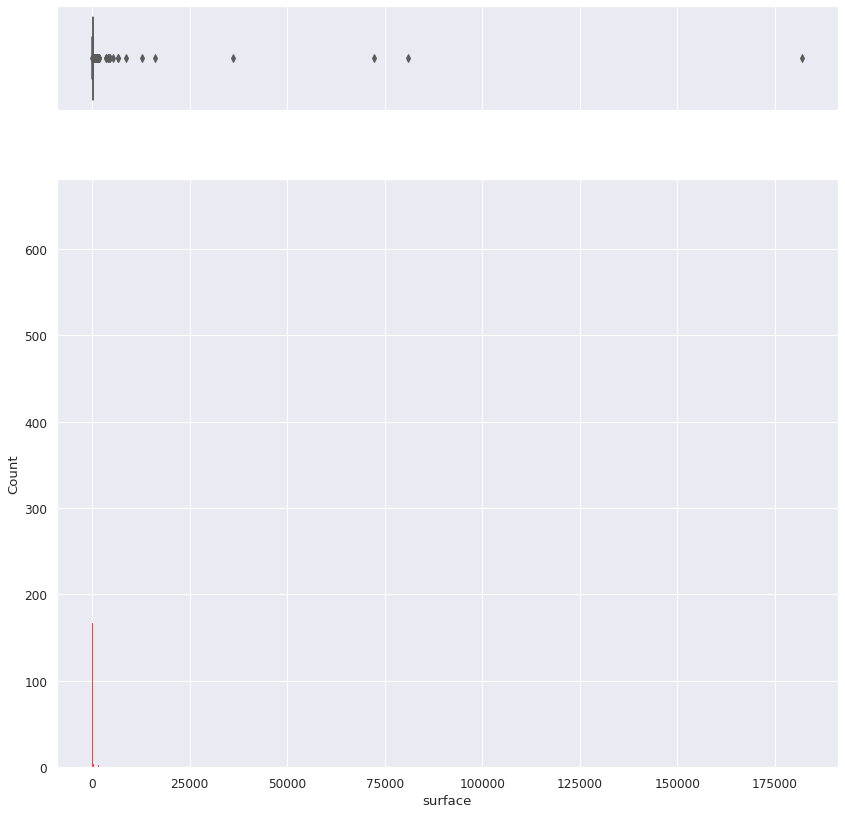

In [612]:
# Representation of the summary of the set of data values 
features = ['latitude', 'longitude', 'price', 'bathrooms', 'beds', 'surface']
fig = plt.figure(figsize=(22,(len(features))*5))
sns.color_palette("rainbow", as_cmap=True)
for i in features: 
  # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
  f, (ax_box, ax_hist) = plt.subplots(2,1, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
  
  # assigning a graph to each ax
  sns.boxplot(house_train[i], ax=ax_box, color="greenyellow")
  sns.histplot(data=house_train, x=i, ax=ax_hist, color="red")
  
  # Remove x axis name for the boxplot
  ax_box.set(xlabel='')

plt.show()

In [613]:
house_train[['latitude', 'longitude', 'bathrooms', 'beds', 'surface']].describe()

,latitude,longitude,bathrooms,beds,surface
count,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000
mean,53.355579,-6.257373,1.991355,2.975450,278.567805
std,0.086445,0.142864,1.266439,1.452494,4023.929576
min,51.458439,-6.521183,0.000000,0.000000,3.400000
25%,53.299255,-6.313874,1.000000,2.000000,79.000000
50%,53.345455,-6.252335,2.000000,3.000000,99.000000
75%,53.388423,-6.197056,3.000000,4.000000,128.000000
max,53.630588,-1.744995,18.000000,27.000000,182108.539008


In [614]:
house_train['bathrooms'].values[house_train['bathrooms'].values > 7 ] = 7
house_test['bathrooms'].values[house_test['bathrooms'].values > 7 ] = 7

house_train['beds'].values[house_train['beds'].values > 10 ] = 10
house_test['beds'].values[house_test['beds'].values > 10 ] = 10

house_train['surface'].values[house_train['surface'].values > 10000] = 10000
house_test['surface'].values[house_test['surface'].values > 10000] = 10000

# Removing location that are outside of Ireland 
# From Nigel Portley
house_train['latitude'] = (house_train['latitude'] -51.45843)/2.173 
house_test['latitude'] = (house_test['latitude'] -51.45843)/2.173 

house_train['longitude'] = (house_train['longitude'] + 6.521187) 
house_test['longitude'] = (house_test['longitude'] + 6.521187)

In [615]:
house_train[['latitude', 'longitude', 'bathrooms', 'beds', 'surface']].describe()

,latitude,longitude,bathrooms,beds,surface
count,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000
mean,0.873055,0.263814,1.972337,2.956777,160.823206
std,0.039781,0.142864,1.127896,1.270913,555.382468
min,0.000004,0.000004,0.000000,0.000000,3.400000
25%,0.847136,0.207313,1.000000,2.000000,79.000000
50%,0.868396,0.268852,2.000000,3.000000,99.000000
75%,0.888170,0.324131,3.000000,4.000000,128.000000
max,0.999613,4.776192,7.000000,10.000000,10000.000000


In [616]:
# Missing Values for the train data
print(house_train.isna().sum())

bathrooms                     0
beds                          0
ber_classification            0
latitude                      0
longitude                     0
price                         0
property_category             0
surface                       0
Co. Dun Laoghaire-Rathdown    0
Co. Fingal                    0
Dublin 1                      0
Dublin 10                     0
Dublin 11                     0
Dublin 12                     0
Dublin 13                     0
Dublin 14                     0
Dublin 15                     0
Dublin 16                     0
Dublin 17                     0
Dublin 18                     0
Dublin 2                      0
Dublin 20                     0
Dublin 22                     0
Dublin 24                     0
Dublin 3                      0
Dublin 4                      0
Dublin 5                      0
Dublin 6                      0
Dublin 6w                     0
Dublin 7                      0
Dublin 8                      0
Dublin 9

In [617]:
# Missing Values for the test data
print(house_test.isna().sum())

bathrooms                     0
beds                          0
ber_classification            0
latitude                      0
longitude                     0
property_category             0
surface                       0
Co. Dun Laoghaire-Rathdown    0
Co. Fingal                    0
Dublin 1                      0
Dublin 10                     0
Dublin 11                     0
Dublin 12                     0
Dublin 13                     0
Dublin 14                     0
Dublin 15                     0
Dublin 16                     0
Dublin 17                     0
Dublin 18                     0
Dublin 2                      0
Dublin 20                     0
Dublin 22                     0
Dublin 24                     0
Dublin 3                      0
Dublin 4                      0
Dublin 5                      0
Dublin 6                      0
Dublin 6w                     0
Dublin 7                      0
Dublin 8                      0
Dublin 9                      0
apartmen

In [618]:
#Returns column name
print('Train Data Columns',house_train.columns)
print('Test Data Columns',house_test.columns)

Train Data Columns Index(['bathrooms', 'beds', 'ber_classification', 'latitude', 'longitude',
       'price', 'property_category', 'surface', 'Co. Dun Laoghaire-Rathdown',
       'Co. Fingal', 'Dublin 1', 'Dublin 10', 'Dublin 11', 'Dublin 12',
       'Dublin 13', 'Dublin 14', 'Dublin 15', 'Dublin 16', 'Dublin 17',
       'Dublin 18', 'Dublin 2', 'Dublin 20', 'Dublin 22', 'Dublin 24',
       'Dublin 3', 'Dublin 4', 'Dublin 5', 'Dublin 6', 'Dublin 6w', 'Dublin 7',
       'Dublin 8', 'Dublin 9', 'apartment', 'bungalow', 'detached', 'duplex',
       'end-of-terrace', 'semi-detached', 'site', 'studio', 'terraced',
       'townhouse'],
      dtype='object')
Test Data Columns Index(['bathrooms', 'beds', 'ber_classification', 'latitude', 'longitude',
       'property_category', 'surface', 'Co. Dun Laoghaire-Rathdown',
       'Co. Fingal', 'Dublin 1', 'Dublin 10', 'Dublin 11', 'Dublin 12',
       'Dublin 13', 'Dublin 14', 'Dublin 15', 'Dublin 16', 'Dublin 17',
       'Dublin 18', 'Dublin 2', 'D

In [619]:
#Returns the dimensions of the array - Rows & Columns
print('Train Data Shape',house_train.shape)
print('Test Data Shape',house_test.shape)

Train Data Shape (2892, 42)
Test Data Shape (500, 41)


## Training & Test Data

### Train dataset

In [620]:
# show first data frame rows 
house_train.head()

,bathrooms,beds,ber_classification,latitude,longitude,price,property_category,surface,Co. Dun Laoghaire-Rathdown,Co. Fingal,Dublin 1,Dublin 10,Dublin 11,Dublin 12,Dublin 13,Dublin 14,Dublin 15,Dublin 16,Dublin 17,Dublin 18,Dublin 2,Dublin 20,Dublin 22,Dublin 24,Dublin 3,Dublin 4,Dublin 5,Dublin 6,Dublin 6w,Dublin 7,Dublin 8,Dublin 9,apartment,bungalow,detached,duplex,end-of-terrace,semi-detached,site,studio,terraced,townhouse
15,3.0,5.0,3.0,0.893706,0.075457,935000.0,1,321.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
26,4.0,4.0,3.0,0.855030,0.135973,485000.0,1,144.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
27,3.0,5.0,3.0,0.894148,0.074553,935000.0,1,321.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
35,5.0,5.0,2.0,0.882166,0.464438,1475000.0,1,312.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
38,2.0,2.0,3.0,0.880672,0.182721,410000.0,1,83.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [621]:
# Generate descriptive statistics
house_train.describe()

,bathrooms,beds,ber_classification,latitude,longitude,price,property_category,surface,Co. Dun Laoghaire-Rathdown,Co. Fingal,Dublin 1,Dublin 10,Dublin 11,Dublin 12,Dublin 13,Dublin 14,Dublin 15,Dublin 16,Dublin 17,Dublin 18,Dublin 2,Dublin 20,Dublin 22,Dublin 24,Dublin 3,Dublin 4,Dublin 5,Dublin 6,Dublin 6w,Dublin 7,Dublin 8,Dublin 9,apartment,bungalow,detached,duplex,end-of-terrace,semi-detached,site,studio,terraced,townhouse
count,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2.892000e+03,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000
mean,1.972337,2.956777,9.909059,0.873055,0.263814,5.323536e+05,0.002420,160.823206,0.087483,0.103734,0.023513,0.004495,0.031812,0.029737,0.060512,0.029046,0.073997,0.044260,0.010028,0.053596,0.013485,0.033195,0.024550,0.061895,0.033195,0.050484,0.023513,0.027663,0.026971,0.040802,0.043914,0.068119,0.261411,0.027663,0.133126,0.020747,0.081259,0.258990,0.016598,0.001037,0.189834,0.009336
std,1.127896,1.270913,2.793423,0.039781,0.142864,5.678148e+05,0.049147,555.382468,0.282590,0.304968,0.151553,0.066907,0.175529,0.169891,0.238474,0.167964,0.261812,0.205708,0.099652,0.225258,0.115361,0.179176,0.154777,0.241006,0.179176,0.218980,0.151553,0.164032,0.162027,0.197866,0.204940,0.251993,0.439479,0.164032,0.339769,0.142560,0.273279,0.438156,0.127780,0.032197,0.392238,0.096188
min,0.000000,0.000000,1.000000,0.000004,0.000004,1.999500e+04,0.000000,3.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,8.000000,0.847136,0.207313,2.800000e+05,0.000000,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,10.000000,0.868396,0.268852,3.800000e+05,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,4.000000,11.000000,0.888170,0.324131,5.750000e+05,0.000000,128.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,10.000000,16.000000,0.999613,4.776192,9.995000e+06,1.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Test dataset

In [622]:
# show first data frame rows 
house_test.head()

,bathrooms,beds,ber_classification,latitude,longitude,property_category,surface,Co. Dun Laoghaire-Rathdown,Co. Fingal,Dublin 1,Dublin 10,Dublin 11,Dublin 12,Dublin 13,Dublin 14,Dublin 15,Dublin 16,Dublin 17,Dublin 18,Dublin 2,Dublin 20,Dublin 22,Dublin 24,Dublin 3,Dublin 4,Dublin 5,Dublin 6,Dublin 6w,Dublin 7,Dublin 8,Dublin 9,apartment,bungalow,detached,duplex,end-of-terrace,semi-detached,site,studio,terraced,townhouse
0,2.0,4.0,15.0,0.970295,0.420039,0,142.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2.0,3.0,7.0,0.876467,0.068278,0,114.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3.0,4.0,6.0,0.918439,0.258223,0,172.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4.0,3.0,3.0,0.872514,0.062540,0,132.4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1.0,3.0,13.0,0.864289,0.127600,0,88.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [623]:
# Generate descriptive statistics
house_test.describe()

,bathrooms,beds,ber_classification,latitude,longitude,property_category,surface,Co. Dun Laoghaire-Rathdown,Co. Fingal,Dublin 1,Dublin 10,Dublin 11,Dublin 12,Dublin 13,Dublin 14,Dublin 15,Dublin 16,Dublin 17,Dublin 18,Dublin 2,Dublin 20,Dublin 22,Dublin 24,Dublin 3,Dublin 4,Dublin 5,Dublin 6,Dublin 6w,Dublin 7,Dublin 8,Dublin 9,apartment,bungalow,detached,duplex,end-of-terrace,semi-detached,site,studio,terraced,townhouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,1.992000,2.930000,9.898000,0.873265,0.273345,0.0,156.007671,0.110000,0.124000,0.008000,0.002000,0.004000,0.024000,0.04200,0.02000,0.060000,0.046000,0.006000,0.060000,0.010000,0.034000,0.016000,0.036000,0.04800,0.072000,0.034000,0.040000,0.052000,0.044000,0.050000,0.058000,0.266000,0.024000,0.140000,0.018000,0.060000,0.270000,0.02200,0.002000,0.190000,0.008000
std,1.096513,1.191612,2.963302,0.037692,0.088552,0.0,344.497362,0.313203,0.329912,0.089173,0.044721,0.063182,0.153202,0.20079,0.14014,0.237725,0.209695,0.077304,0.237725,0.099598,0.181411,0.125601,0.186477,0.21398,0.258747,0.181411,0.196155,0.222249,0.205301,0.218163,0.233978,0.442307,0.153202,0.347335,0.133084,0.237725,0.444404,0.14683,0.044721,0.392694,0.089173
min,0.000000,0.000000,2.000000,0.811283,0.024200,0.0,33.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,8.000000,0.846269,0.224783,0.0,72.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,10.000000,0.865677,0.277615,0.0,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,3.000000,4.000000,12.000000,0.885053,0.336132,0.0,138.935000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
max,7.000000,7.000000,16.000000,0.994636,0.456313,0.0,5746.536120,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


### Expected Cost dataset

In [624]:
# show sample data frame rows 
true_price.sample()

,Expected
396,375000.0


In [625]:
#Returns the dimensions of the array
true_price.shape

(500, 1)

In [626]:
# Generate descriptive statistics
true_price.describe()

,Expected
count,5.000000e+02
mean,5.810356e+05
std,6.009194e+05
min,8.500000e+04
25%,2.950000e+05
50%,4.250000e+05
75%,5.950000e+05
max,5.750000e+06


**SUMMARY**

Range of activities was performed in order to clean and analyse data. The main scope of above activity was in making data as responsive as possible to upcoming modelling. While eliminating missing value and encoding the data, we have made sure that some of disturbing noise is eliminated.

We were receiving 2 datasets: `true_price` and `house_data`. The house_data data set was split into the training and test part. I have used 30% for the test dataset.

As per above, we can see that `true_price` dataset has 500 lines and 2 columns with no missing values. `ID` column was removed, a it has an unique data for each role, which makes it hard to use in this exercise.

`House_train` dataset has 2982 rows and 17 columns, where `house_test` has 500 rows and 16 columns. Some data are missing and some data are categorical. 

From the beginning we had 3 types of data which were transformed in the numerical.


**Numerical**

*   `Id property` -was dropped (different for each row)
*   `bathroom`s - Number of bathrooms (float)  (outliers were removed reassigning the values)
*   `beds` - Number of bedrooms (outliers were removed reassigning the values)
*   `latitude` - Geographical latitude (float) (outliers were removed reassigning the values)
*   `longitude` - Geographical longitude (float) (outliers were removed reassigning the values)
*   `no_of_units` - Number of units sold, it has been dropped as most of the data was missing 
*   `surface` - total living area (float) (missing values which are 15.82%, were filled up with the median. The outliers also were removed reassigning those values)
*   `price` - to predict (missing values was 16.94%, it makes sense to drop them)


**Categorical**

*   `area` - represents city (Dublin) areas (was categorised / converted to the numerical values- as this is an important feature in price predict. Replacing the 157 characters)
*   `ber_classification` - energy efficiency in the house is (as categorised / converted to the numerical values. Replacing the 16 characters)
*   `county` - the County / state (this value was dropped, they seem to be default values)
*   `environment` - was dropped (this value was dropped, they seem to be default values)
*   `facility` - available facilities available in the house (too many unique data, was dropped)
`features` - (as categorised / converted to the numerical values. Replacing the 10 characters)
*   `property_type` - type of property (was one hot encoded)
*   `property_category` - sale or new development (data was converted to the numerical)


**Text features**

Were dropped as reading them would be extremely difficult


# PIECEWISE REGRESSION

In [627]:
# Selecting features with XGBoost
from xgboost import XGBClassifier
from xgboost import plot_importance

house_train_fi = house_train.copy()

X = house_train_fi.drop('price',axis=1)
y = house_train_fi['price']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
fi_Model = XGBClassifier()
fi_Model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

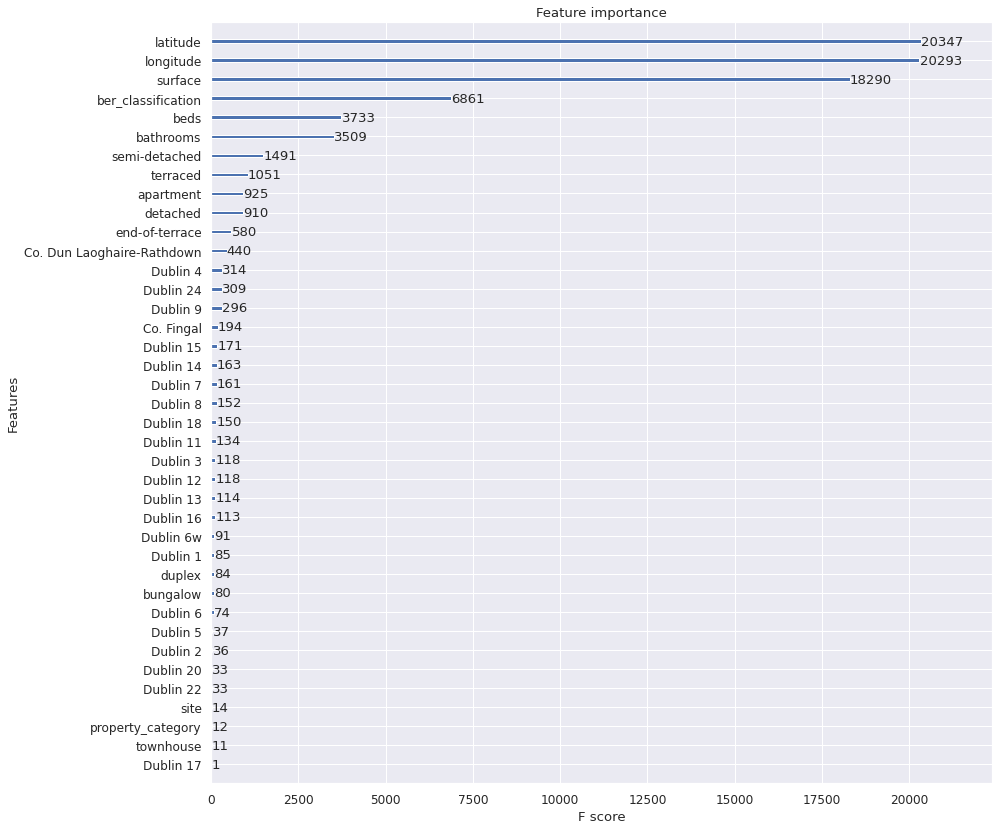

In [628]:
# plot feature importance
plt.rcParams["figure.figsize"] = (14, 14)
plot_importance(fi_Model)
plt.show();

The latitude, longitude, surface, ber_classification, beds, bathrooms, price have the highest importance according to the XGBoost. Latutude and longitude both came as a very strong features in determining the price. I would say that in my opinion it it should be directly connected to the Dublin areas, as they both supplies the same nature of information. As we don't know how the reporting for the dataset was performed, we may assume that latitude and longitude would be much more accurate in the data collecting process.

## Full Model

In [629]:
# select some features columns just for the baseline model
# assume not all of the features are informative or useful
# in this exercise you could try all of them if possible

featrain = ['latitude','longitude','surface','beds','ber_classification','bathrooms','semi-detached','terraced','apartment','detached','end-of-terrace','price']
# dropna: remove missing values
df_subset_train = house_train[featrain].dropna(axis=0)

featest = ['latitude','longitude','surface','ber_classification','beds','bathrooms','semi-detached','terraced','apartment','detached','end-of-terrace']
# dropna: remove missing values
df_subset_test  =  house_test[featest].dropna(axis=0)

# Correlation of expected price in df_subset_test 
df_cost = true_price[true_price.index.isin(df_subset_test.index)]

In [630]:
print('Number of nan in df_subset_train dataset: ',df_subset_train.isnull().sum().sum())
print('Number of nan in df_subset_test dataset: ',df_subset_test.isnull().sum().sum())

Number of nan in df_subset_train dataset:  0
Number of nan in df_subset_test dataset:  0


In [631]:
# train set, input columns
Xs_train = df_subset_train.iloc[:,0:-1].values 
# train set, output column, cost
ys_train = df_subset_train.iloc[:,-1].values.reshape(-1,1)   

# test set, input columns
Xs_test = df_subset_test.iloc[:,0:].values 
# test set, output column, cost
y_test = df_cost.Expected.values

In [632]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)


In [633]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

Finished [100%]: Average Loss = 2,995.4


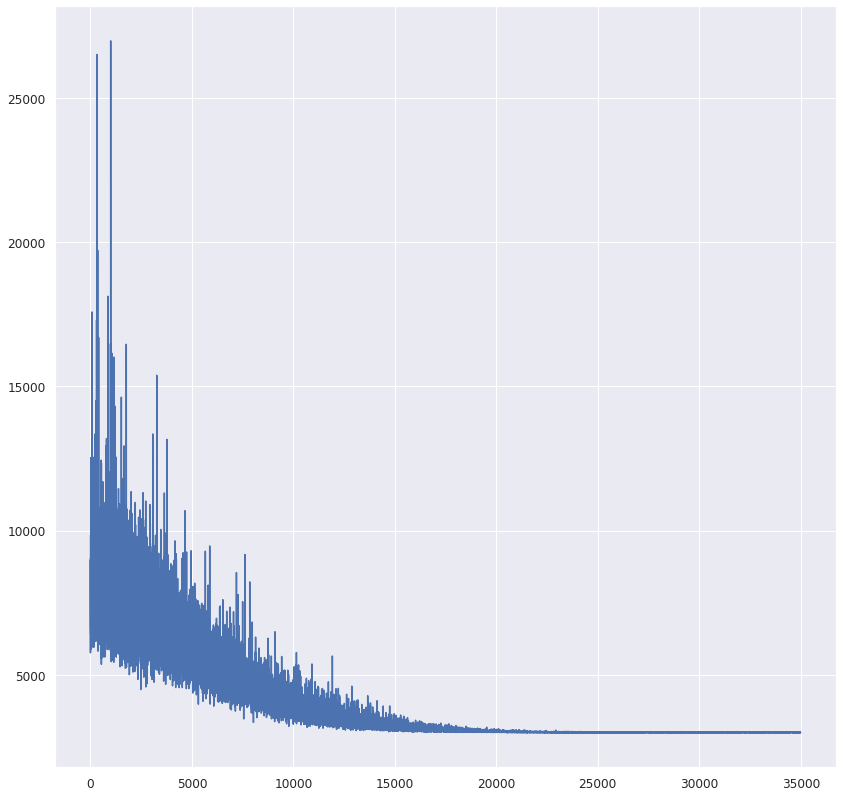

In [634]:
#number of iterations of the algorithms
iter = 35000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [635]:
# samples from the posterior
posterior = approximation.sample(5000)

In [636]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))

MAE =  1428174.8266853904
MAPE =  3.450554770008777


## Clustering

### Full Model

3392

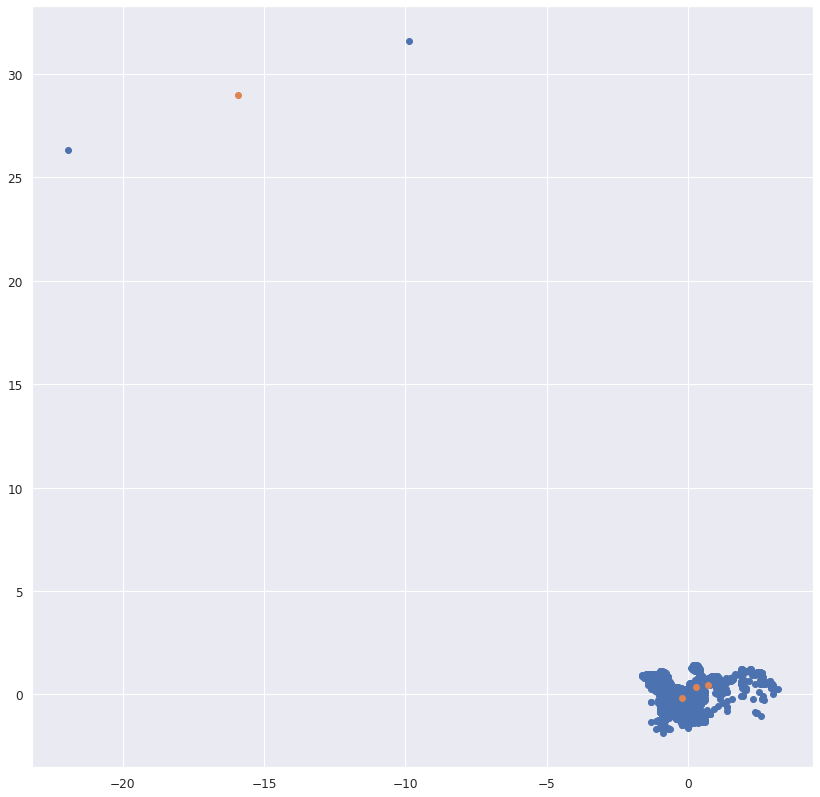

In [637]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
from sys import maxsize
from numpy import set_printoptions

gmm = GaussianMixture(n_components=4)
# clustering by features 1 - 2
ind=[0,1,2]
X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])
# lenght of feature clustering
len(X_ind)


In [638]:
# using some feedback provided in peer-to-peer review 
indexes = np.array([697,791])
X_ind = np.delete(X_ind, indexes, axis=0)
Xn_train = np.delete(Xn_train, indexes, axis=0)
ys_train = np.delete(ys_train, indexes, axis=0)

3390

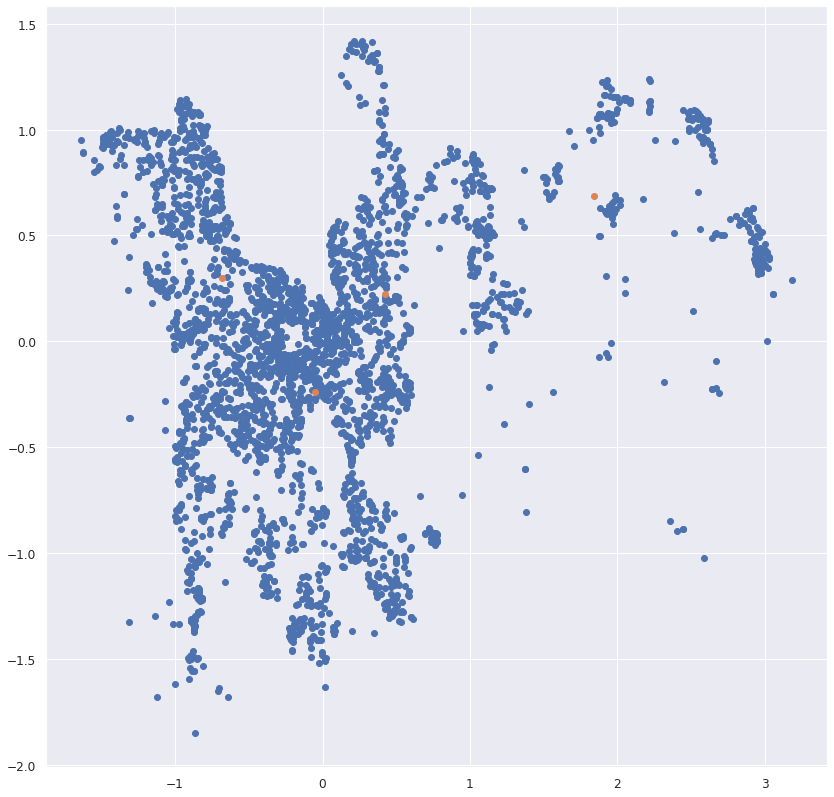

In [639]:
# using Gaussian Mixture to re-fit the data
gmm.fit(X_ind)
plt.scatter(X_ind[:,0],X_ind[:,1])
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])
len(X_ind)

### Clusters

In [659]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 1931, 1: 78, 2: 598, 3: 283}

In [660]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))


{0: 299, 1: 15, 2: 128, 3: 58}

In [661]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [662]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [663]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [664]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

## Piecewise Model

In [665]:
# model_0
# Generating a fitted model before returning a sample of values
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)



Finished [100%]: Average Loss = 2,074.4


In [666]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 148.86


In [667]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 551.34


In [668]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 277.25


In [679]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

##Simulations

### Only Cluster 0

Text(0, 0.5, 'density plot')

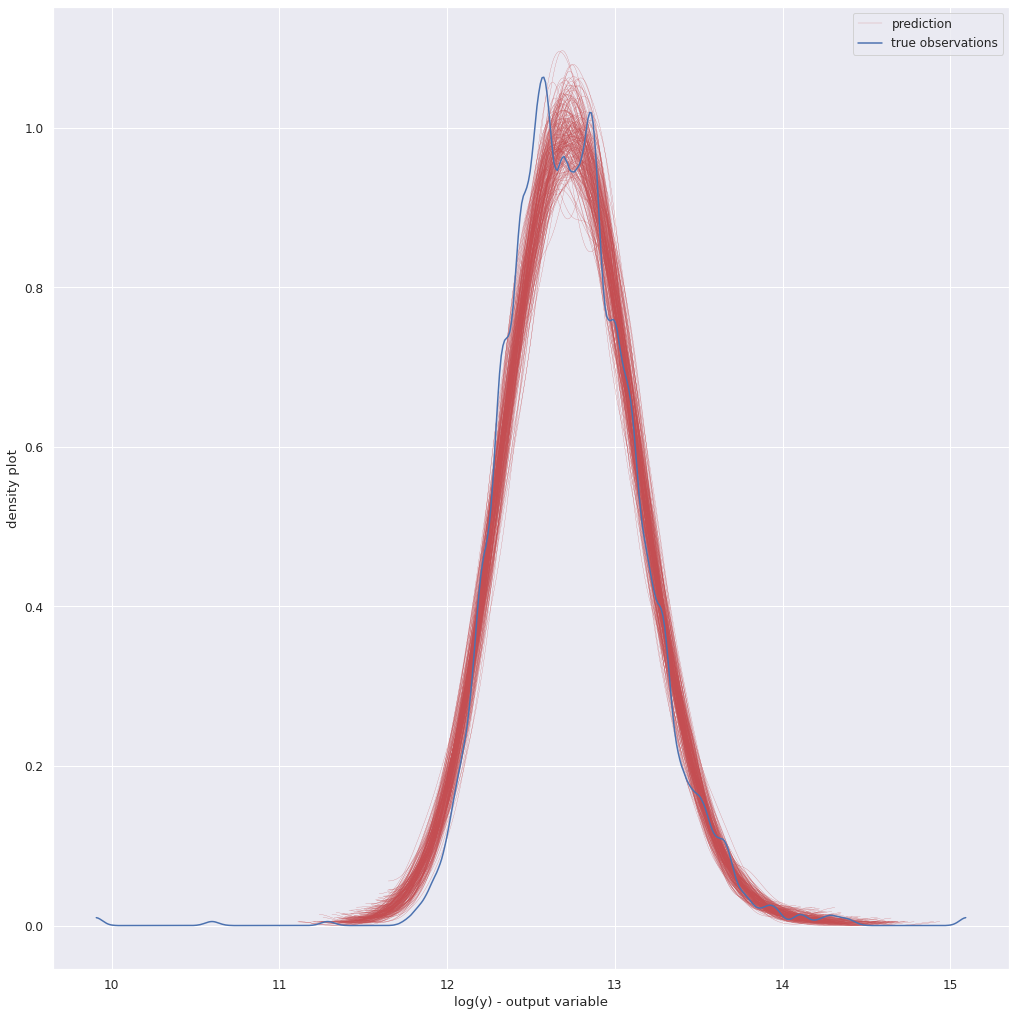

In [680]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot")

Only Cluster 1

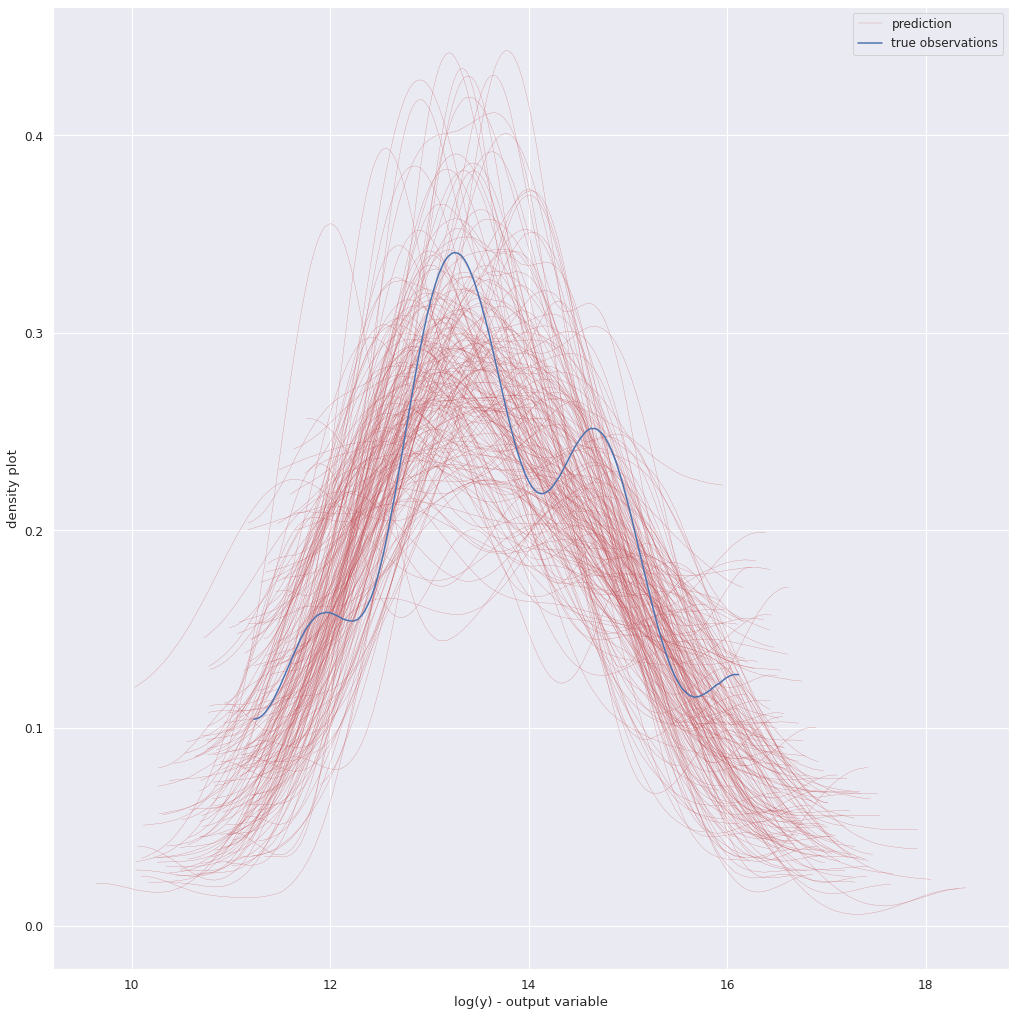

In [681]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Only Cluster 2

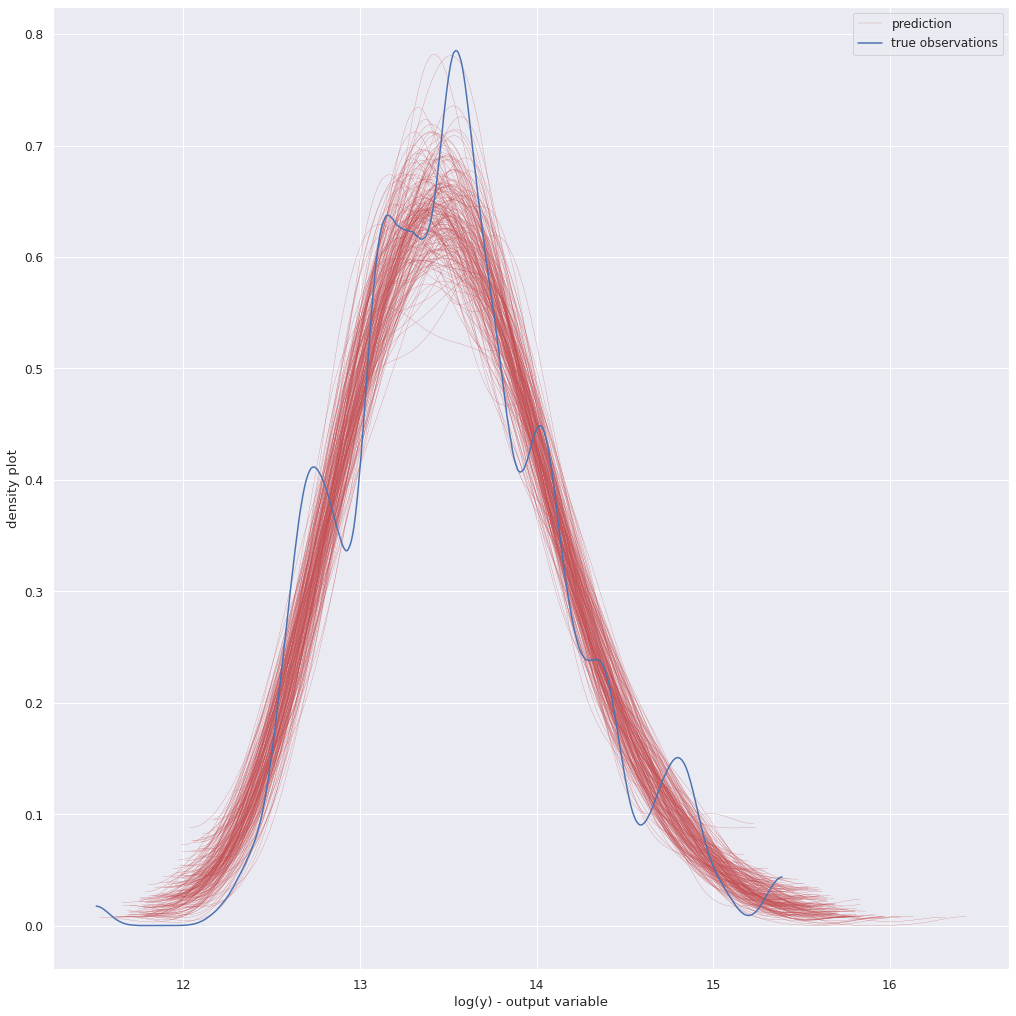

In [672]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Obly Cluster 3

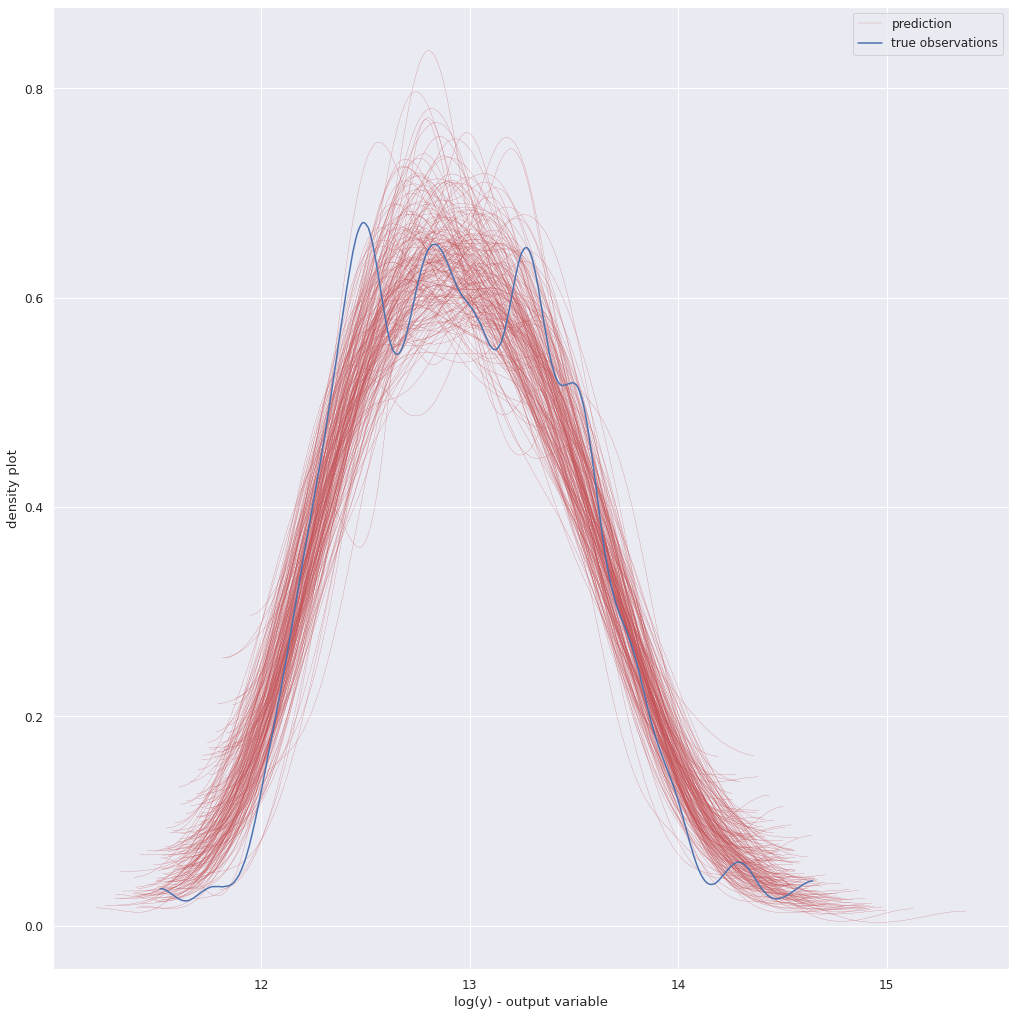

In [673]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Overall

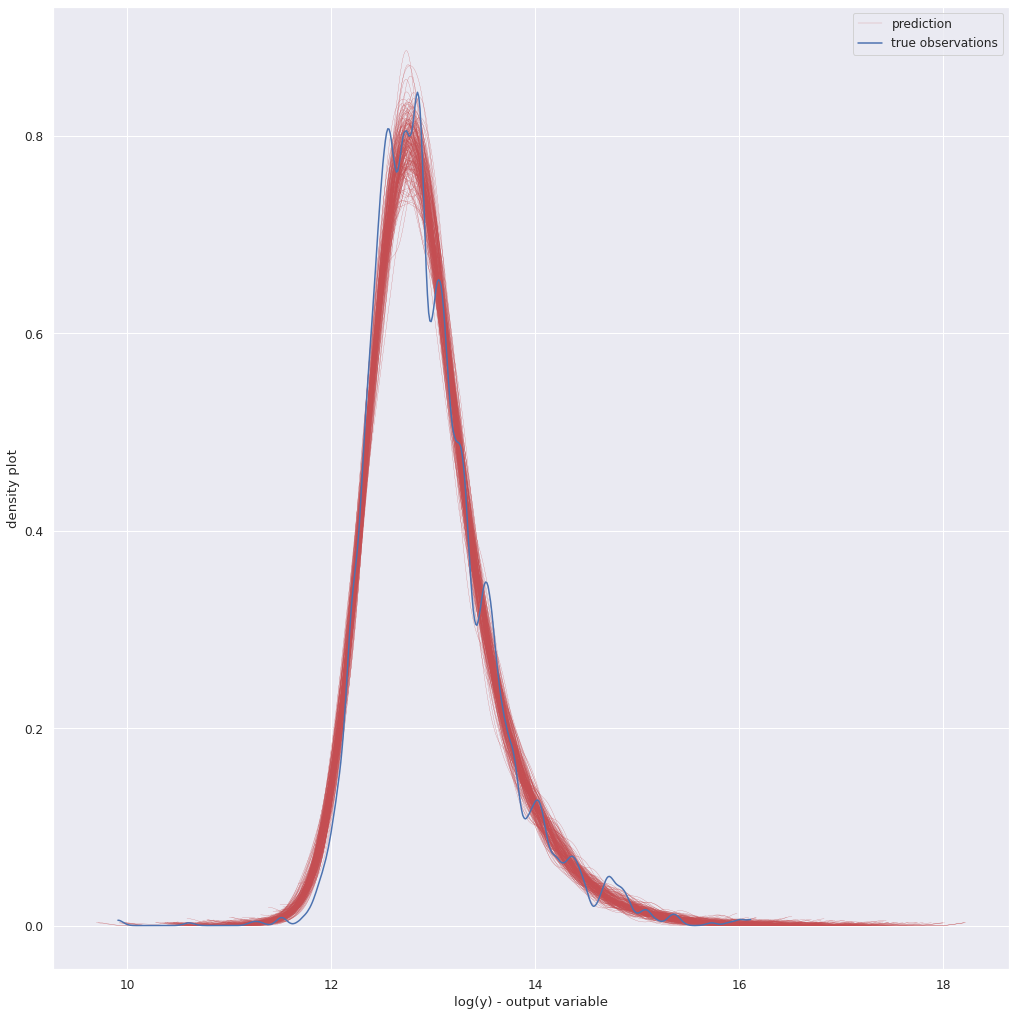

In [674]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)

# simulation
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                   yscaler1.inverse_transform(Ypred1),
                   yscaler2.inverse_transform(Ypred2),
                   yscaler3.inverse_transform(Ypred3)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Test set performance

In [676]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", MAE Cluster 0=",
      (np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]))))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster 1=",
      (np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]))))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster 2=",
      (np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]))))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster 3=",
      (np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]))))

# joint
joint=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]),
                 abs(y_pred_BLR1 - y_test[clusters_test==1]),
                 abs(y_pred_BLR2 - y_test[clusters_test==2]),
                 abs(y_pred_BLR3 - y_test[clusters_test==3])])

# MAE
print("MAE=",np.mean(joint))

Size Cluster0 299 , MAE Cluster 0= 630720.2148075167
Size Cluster1 15 , MAE Cluster 1= 1438058.284139544
Size Cluster2 128 , MAE Cluster 2= 352830.1607071435
Size Cluster3 58 , MAE Cluster 3= 616317.3991369883
MAE= 582129.7764200007


### PPC on the Test set



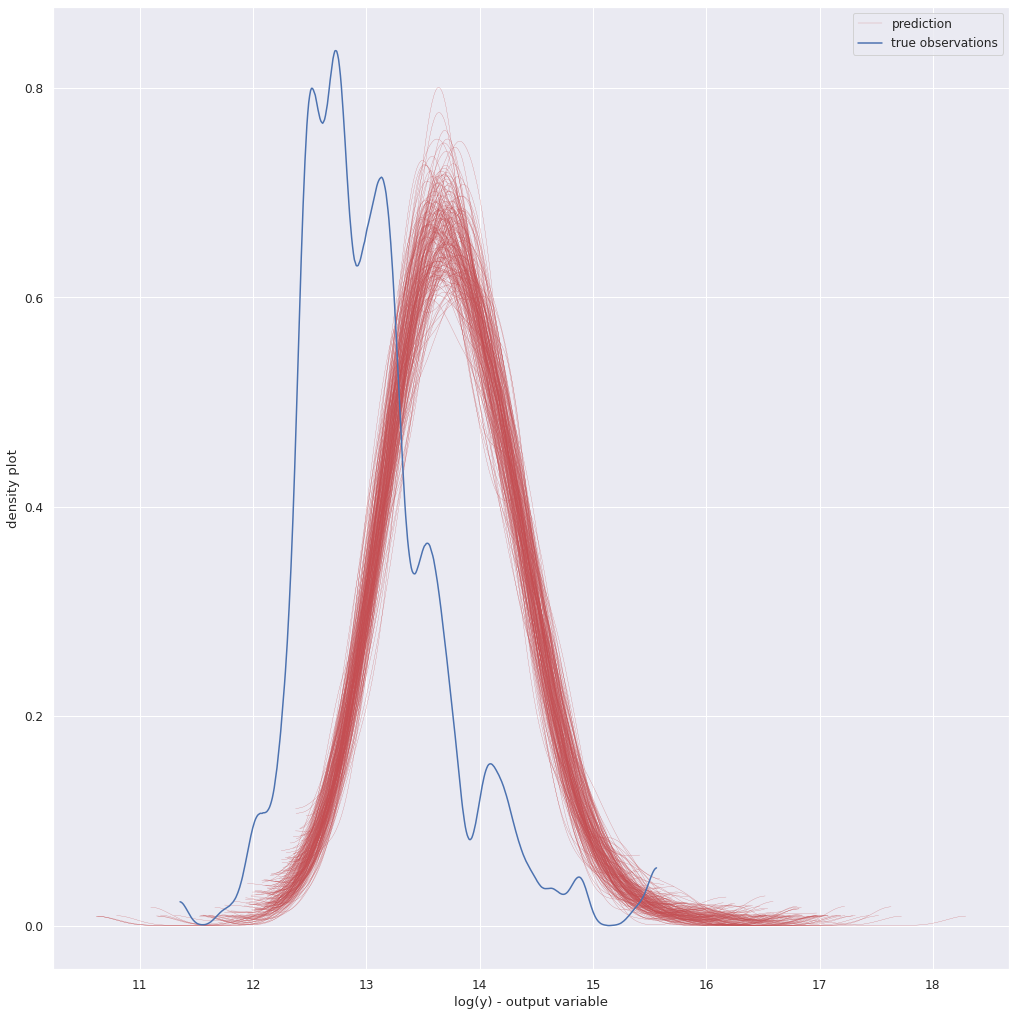

In [678]:
## Posterior predictive checks (PPCs)

num_samples2 = 200
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3, nsamples=num_samples2)

# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(np.log(y_test),label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

# SUMMARY

This E-tivity 2 has a scope of creating a piecewise regression model following the guidelines from the notebook provided to predict the house price using the provided dataset in the GitHub repository. It has been supplied to us two datasets. First one is a true_price data that describes the cost of the properties, and the second on is a house_data to describe the properties (split into the train and test data).

In detail Data Analytics were performed, which usually is the heaviest part of any ML process. It’s very interesting to observe that cleaning the data would be mostly consuming up to 80% of your time, but otherwise the model will not run. I omitted some to convert to the numerical values some variables, and the model was giving me an error. So the conclusion is very simple, without proper data quality the output of the ML models can be compromised.  

As per above certain modifications were added to the data quality. 
Some of my peers used XGBoost model for the features selections and I loved it. In my opinion it is easy to use and very practical. Based on the model output latitude, longitude, surface, ber_classification, beds, bathrooms, price were the selected features. In the final version of the E-tivity I have also added next features: semi-detached, terraced, apartment, detached, end-of-terrace.

I decided to select all relatively relevant futures, i.e. 12 features in the training and 11 features in the test data.
Train Data Shape (2892, 42)
Test Data Shape (500, 41)

**Full Model:**

Full model was relatively successful, with MAE (Mean Absolute Error) and MAPE (Mean Absolute Percentage Error) as per below:
MAE =  1428174.8266853904
MAPE =  3.450554770008777

**Clustering:**

Below are the some of the obtained parametes:

•	Model 0 Average Loss = 2,074.4

•	Model 1 Average Loss = 148.86

•	Model 2 Average Loss = 551.35

•	Model 3 Average Loss = 277.26

**Simulations:**

I have experienced multiple run-to-run variation. Anyway in most of the cases cluster plots were relatively true. Overall plot was good. 


**Test Set Data:**

In detail statistics are as follow:

•	Size Cluster0 299 , MAE Cluster 0= 630720.2148075167

•	Size Cluster1 15 , MAE Cluster 1= 1438058.284139544

•	Size Cluster2 128 , MAE Cluster 2= 352830.1607071435

•	Size Cluster3 58 , MAE Cluster 3= 616317.3991369883

MAE= 582129.7764200007

The PPC (Posterior Predictive Checks) function was plotted inaccurately. I would need a firther investigation here


References

*  Ahtesham, M., Bawany, N. Z. and Fatima, K. (2020) 'House Price Prediction using Machine Learning Algorithm - The Case of Karachi City, Pakistan', 2020 21st International Arab Conference on Information Technology (ACIT), 1-5, available: https://doi.org/10.1109/ACIT50332.2020.9300074
*  Cronin, Beau. "Why Probabilistic Programming Matters." 24 Mar 2013. Google, Online Posting to Google . Web. 24 Mar. 2013. https://carlonicolini.github.io/sections/science/2018/05/21/why-probabilistic-programming-matters.html
*  Davidson-Pilon, C. (2015) Bayesian methods for hackers : probabilistic programming and bayesian inference. First printing. Addison-Wesley, USA
*  Downey, A. B. (2013) Think Bayes. First Edition. O’Reilly Media, USA
*  Flaxman, Abraham. "Powell's Methods for Maximization in PyMC." Healthy Algorithms. N.p., 9 02 2012. Web. 28 Feb 2013. http://healthyalgorithms.com/2012/02/09/powells-method-for-maximization-in-pymc/
Gadekar, A., 2021. Feature Importance In Machine Learning using XG Boost | Python. [online] CodeSpeedy. Available at: https://www.codespeedy.com/feature-importance-in-machine-learning-using-xg-boost/
*  Gelman, Andrew, and Cosma R. Shalizi. "Philosophy and the practice of Bayesian statistics." British Journal of Mathematical and Statistical Psychology. (2012): n. page. Web. 17 Apr. 2013
*  Salvatier, J, Wiecki TV, and Fonnesbeck C. (2016) Probabilistic programming in Python using PyMC3. PeerJ Computer Science 2:e55 https://doi.org/10.7717/peerj-cs.55
*  VanderPlas, J., 2016, Python Data Science Handbook. O'Reilly Media, Inc. Available at: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html


In [685]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('ET5003_Etivity2_MariannaBotika_ID_20188277.ipynb')
